In [14]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [15]:
df = pd.read_csv("sim_data_full.csv")

In [16]:
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [17]:
# Is scenario 32 in the Sahel missing?
df[df["scenario_number"]==32]

,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,...,screen_type,drug_type,out_of_school_rate,ivermectin,primaquine,itn_coverage,hs_rate,smc_on,smc_coverage,comments
39,Sahel,pfpr,0.05,32,0.0,0.0,1275.15,0.0,3736.45,3559.46,...,IPT,DP,0.2,False,False,0.7,0.6,True,0.6,u10 SMC - DP
50,Sahel,pfpr,0.10,32,0.0,0.0,1972.21,0.0,3596.23,3277.49,...,IPT,DP,0.2,False,False,0.7,0.6,True,0.6,u10 SMC - DP
61,Sahel,pfpr,0.20,32,0.0,0.0,2809.05,0.0,3731.81,3180.92,...,IPT,DP,0.2,False,False,0.7,0.6,True,0.6,u10 SMC - DP
72,Sahel,pfpr,0.30,32,0.0,0.0,3540.40,0.0,3679.04,3127.07,...,IPT,DP,0.2,False,False,0.7,0.6,True,0.6,u10 SMC - DP
83,Sahel,pfpr,0.40,32,0.0,0.0,4389.42,0.0,3703.07,3400.32,...,IPT,DP,0.2,False,False,0.7,0.6,True,0.6,u10 SMC - DP


40    0.05
51    0.10
62    0.20
73    0.30
84    0.40
Name: transmission_level, dtype: float64
40    41.247960
51    35.027115
62    24.324517
73    18.202447
84    13.537987
Name: frac_averted_clinical_0_5, dtype: float64
u15 SMC with DP
solid
#D61C5B
40    0.05
51    0.10
62    0.20
73    0.30
84    0.40
Name: transmission_level, dtype: float64
40    65.881886
51    63.533443
62    55.599315
73    51.525424
84    47.807822
Name: frac_averted_clinical_6_15, dtype: float64
u15 SMC with DP
solid
#D61C5B
40    0.05
51    0.10
62    0.20
73    0.30
84    0.40
Name: transmission_level, dtype: float64
40    34.217249
51    28.205794
62    17.115865
73    15.119138
84     9.640626
Name: frac_averted_clinical_16_500, dtype: float64
u15 SMC with DP
solid
#D61C5B


meta NOT subset; don't know how to subset; dropped


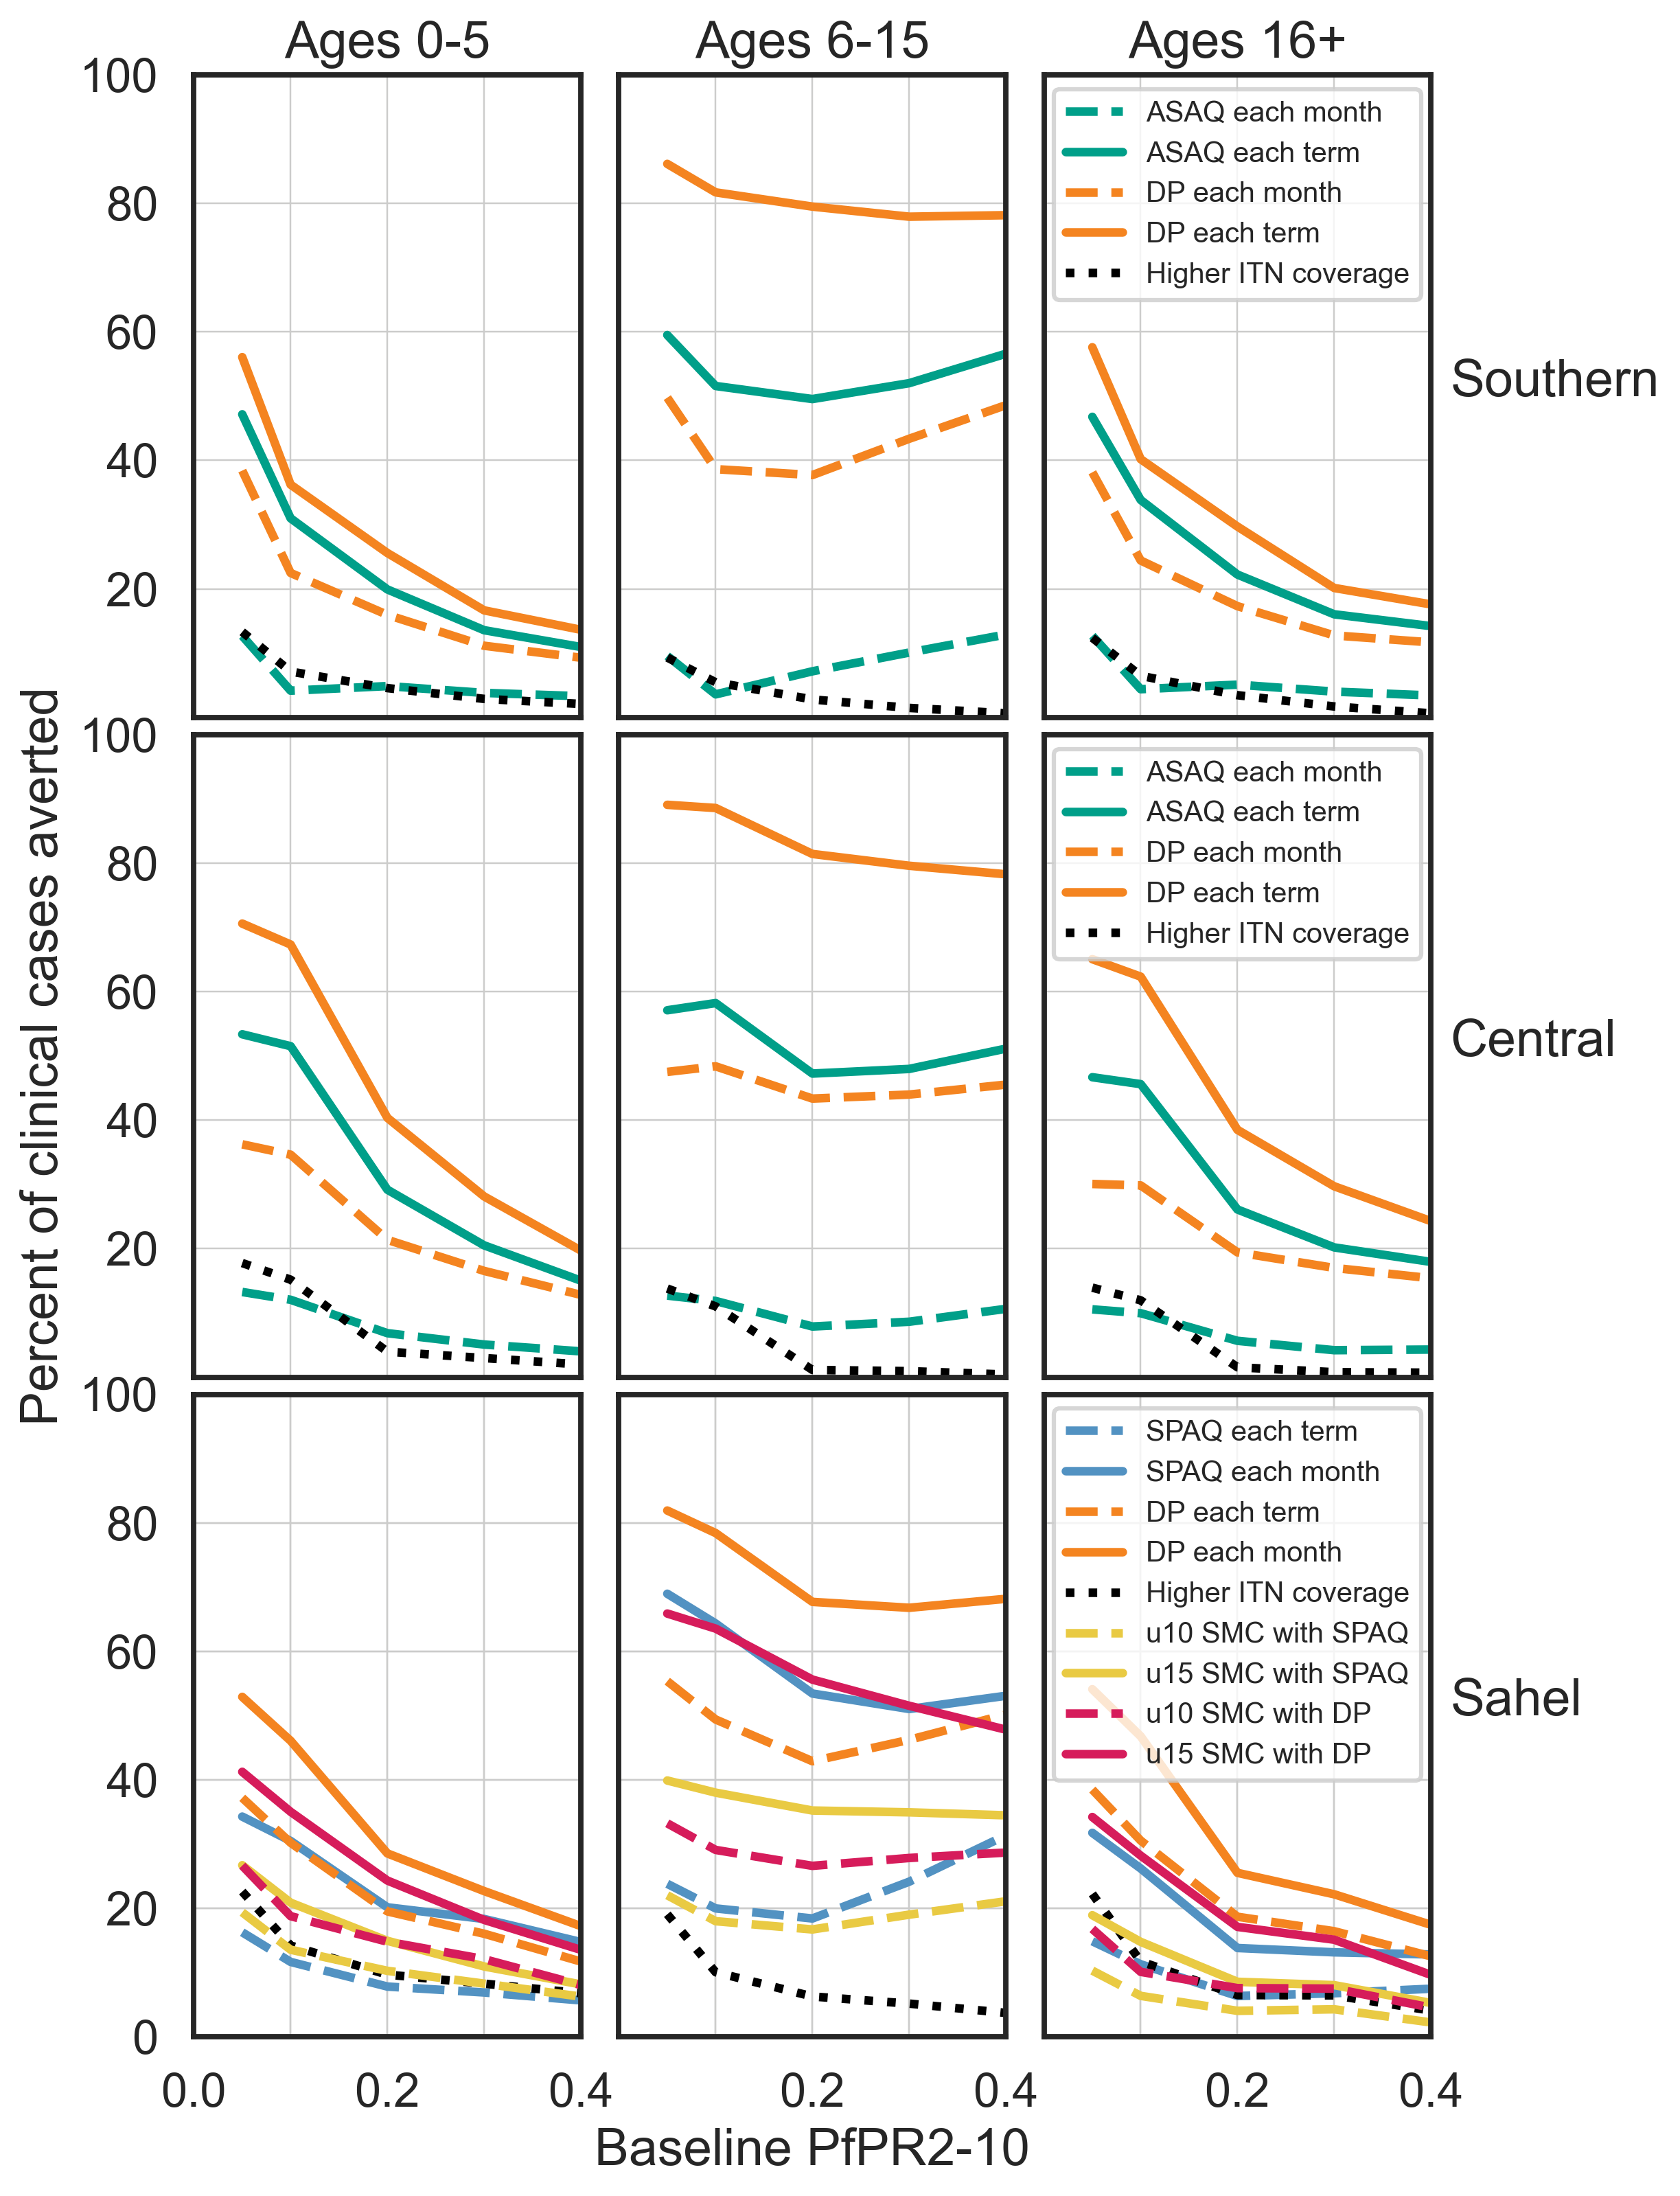

In [18]:
plt.figure(dpi=300, figsize=(8.5,11))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

# ========================================================================
# SOUTHERN

df_agg = df_pfpr[df_pfpr["archetype"]=="Southern"]


label_dict = {
    6: "ASAQ each month",
    7: "ASAQ each term",
    8: "DP each month",
    9: "DP each term",
    5: "Higher ITN coverage"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]


color_dict = {
    6: "#009F89", #"#5292C2",
    7: "#009F89", #"#5292C2",
    8: "#F48420",
    9: "#F48420",
    5: "black"
}

linestyle_dict = {
    6: "dashed",
    7: "solid",
    8: "dashed",
    9: "solid",
    5: "dotted"
}

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(3,3,i+1)

    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = 100*s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle_dict[s], c=c, lw=3)
        if i == 2:
            plt.legend(fontsize=10, loc="upper center")


        if i == 0:
            plt.yticks([20,40,60,80,100])
        else: 
            plt.yticks([])
        plt.xticks([])
        plt.ylim([0,100])

        plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)

        plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
        # plt.axvline(0.4, c="#CCCCCB", zorder=0)
        plt.xlim([0.0,0.4])

        plt.title(agebin_label)

    if i == 2:
        plt.text(0.42,50,"Southern")


        # ax1 = plt.gca()
        # ax2 = ax1.twinx()
        # ax2.set_ylabel("test")

        
# ==================================================================================================
# CENTRAL

df_agg = df_pfpr[df_pfpr["archetype"]=="Central"]

label_dict = {
    6: "ASAQ each month",
    7: "ASAQ each term",
    8: "DP each month",
    9: "DP each term",
    5: "Higher ITN coverage"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]


color_dict = {
    6: "#009F89", #"#5292C2",
    7: "#009F89", #"#5292C2",
    8: "#F48420",
    9: "#F48420",
    5: "black"
}

# linestyle_dict = {
#     1: "dashed",
#     4: "solid",
#     13: "dashed",
#     16: "solid",
#     31: "dotted"
# }



agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(3,3,i+1+3)

    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = 100*s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle_dict[s], c=c, lw=3)
        if i == 2:
            plt.legend(fontsize=10, loc="upper center")
        # if i == 1:
        #     plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")

        if i == 0:
            plt.yticks([20,40,60,80,100])
        else:
            plt.yticks([])
        plt.xticks([])
        plt.ylim([0,100])
        # plt.title(agebin_label)

        plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)

        plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
        # plt.axvline(0.4, c="#CCCCCB", zorder=0)
        plt.xlim([0.0,0.4])

    if i == 2:
        plt.text(0.42,50,"Central")




# ==========================================================================
# SAHEL
# plt.suptitle("Clinical burden averted (Sahel)")
df_agg = df_pfpr[df_pfpr["archetype"]=="Sahel"]

label_dict = {
    6: "SPAQ each term",
    7: "SPAQ each month",
    8: "DP each term",
    9: "DP each month",
    5: "Higher ITN coverage",
    30: "u10 SMC with SPAQ",
    31: "u15 SMC with SPAQ",
    32: "u10 SMC with DP",
    33: "u15 SMC with DP"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {
    6: "#5292C2",
    7: "#5292C2",
    8: "#F48420",
    9: "#F48420",
    5: "black",
    30: "#E9CA43",
    31: "#E9CA43",
    32: "#D61C5B",
    33: "#D61C5B"
    # 35: "#E9CA43",
    # 36: "#D61C5B"
}

linestyle_dict = {
    6: "dashed",
    7: "solid",
    8: "dashed",
    9: "solid",
    5: "dotted",
    30: "dashed",
    31: "solid",
    32: "dashed",
    33: "solid"
    # 35: "solid",
    # 36: "solid"
}

    


for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(3,3,i+1+6)
    
    for s in scenario_list:
        # print(s)
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = 100*s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle_dict[s], c=c, lw=3)
        
        if s == 33:
            print(x)
            print(y)
            print(label_dict[s])
            print(linestyle_dict[s])
            print(c)
        
        if i == 2:
            plt.legend(fontsize=10, loc="upper center")
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        # if i == 0:
        #     plt.ylabel("Percent of clinical cases averted")
        if i == 0:
            plt.yticks([0,20,40,60,80,100])
        else:
            plt.yticks([])
        if i == 0:
            plt.xticks([0,0.2,0.4])
        else:
            plt.xticks([0.2,0.4])
        plt.ylim([0,100])

        
        plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)
        
        plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
        # plt.axvline(0.4, c="#CCCCCB", zorder=0)
        plt.xlim([0.0,0.4])
        
    if i == 2:
        plt.text(0.42,50,"Sahel")

        
plt.tight_layout(w_pad=0.1,h_pad=0)
plt.savefig("cases_averted_all_archetypes_v4.pdf")

In [9]:
# Debugging: why is scenario 32 missing?
df_agg = df_pfpr[df_pfpr["archetype"]=="Sahel"]
df_agg[df_agg["scenario_number"]==32]


,archetype,baseline_transmission_metric,transmission_level,scenario_number,iptsc_rdts_used,iptsc_drugs_used_school,cases_treated,severe_cases_treated,received_smc_u5,received_smc_5-10,...,screen_type,drug_type,out_of_school_rate,ivermectin,primaquine,itn_coverage,hs_rate,smc_on,smc_coverage,comments


# (Appendix): Sweep over health-seeking rate

meta NOT subset; don't know how to subset; dropped


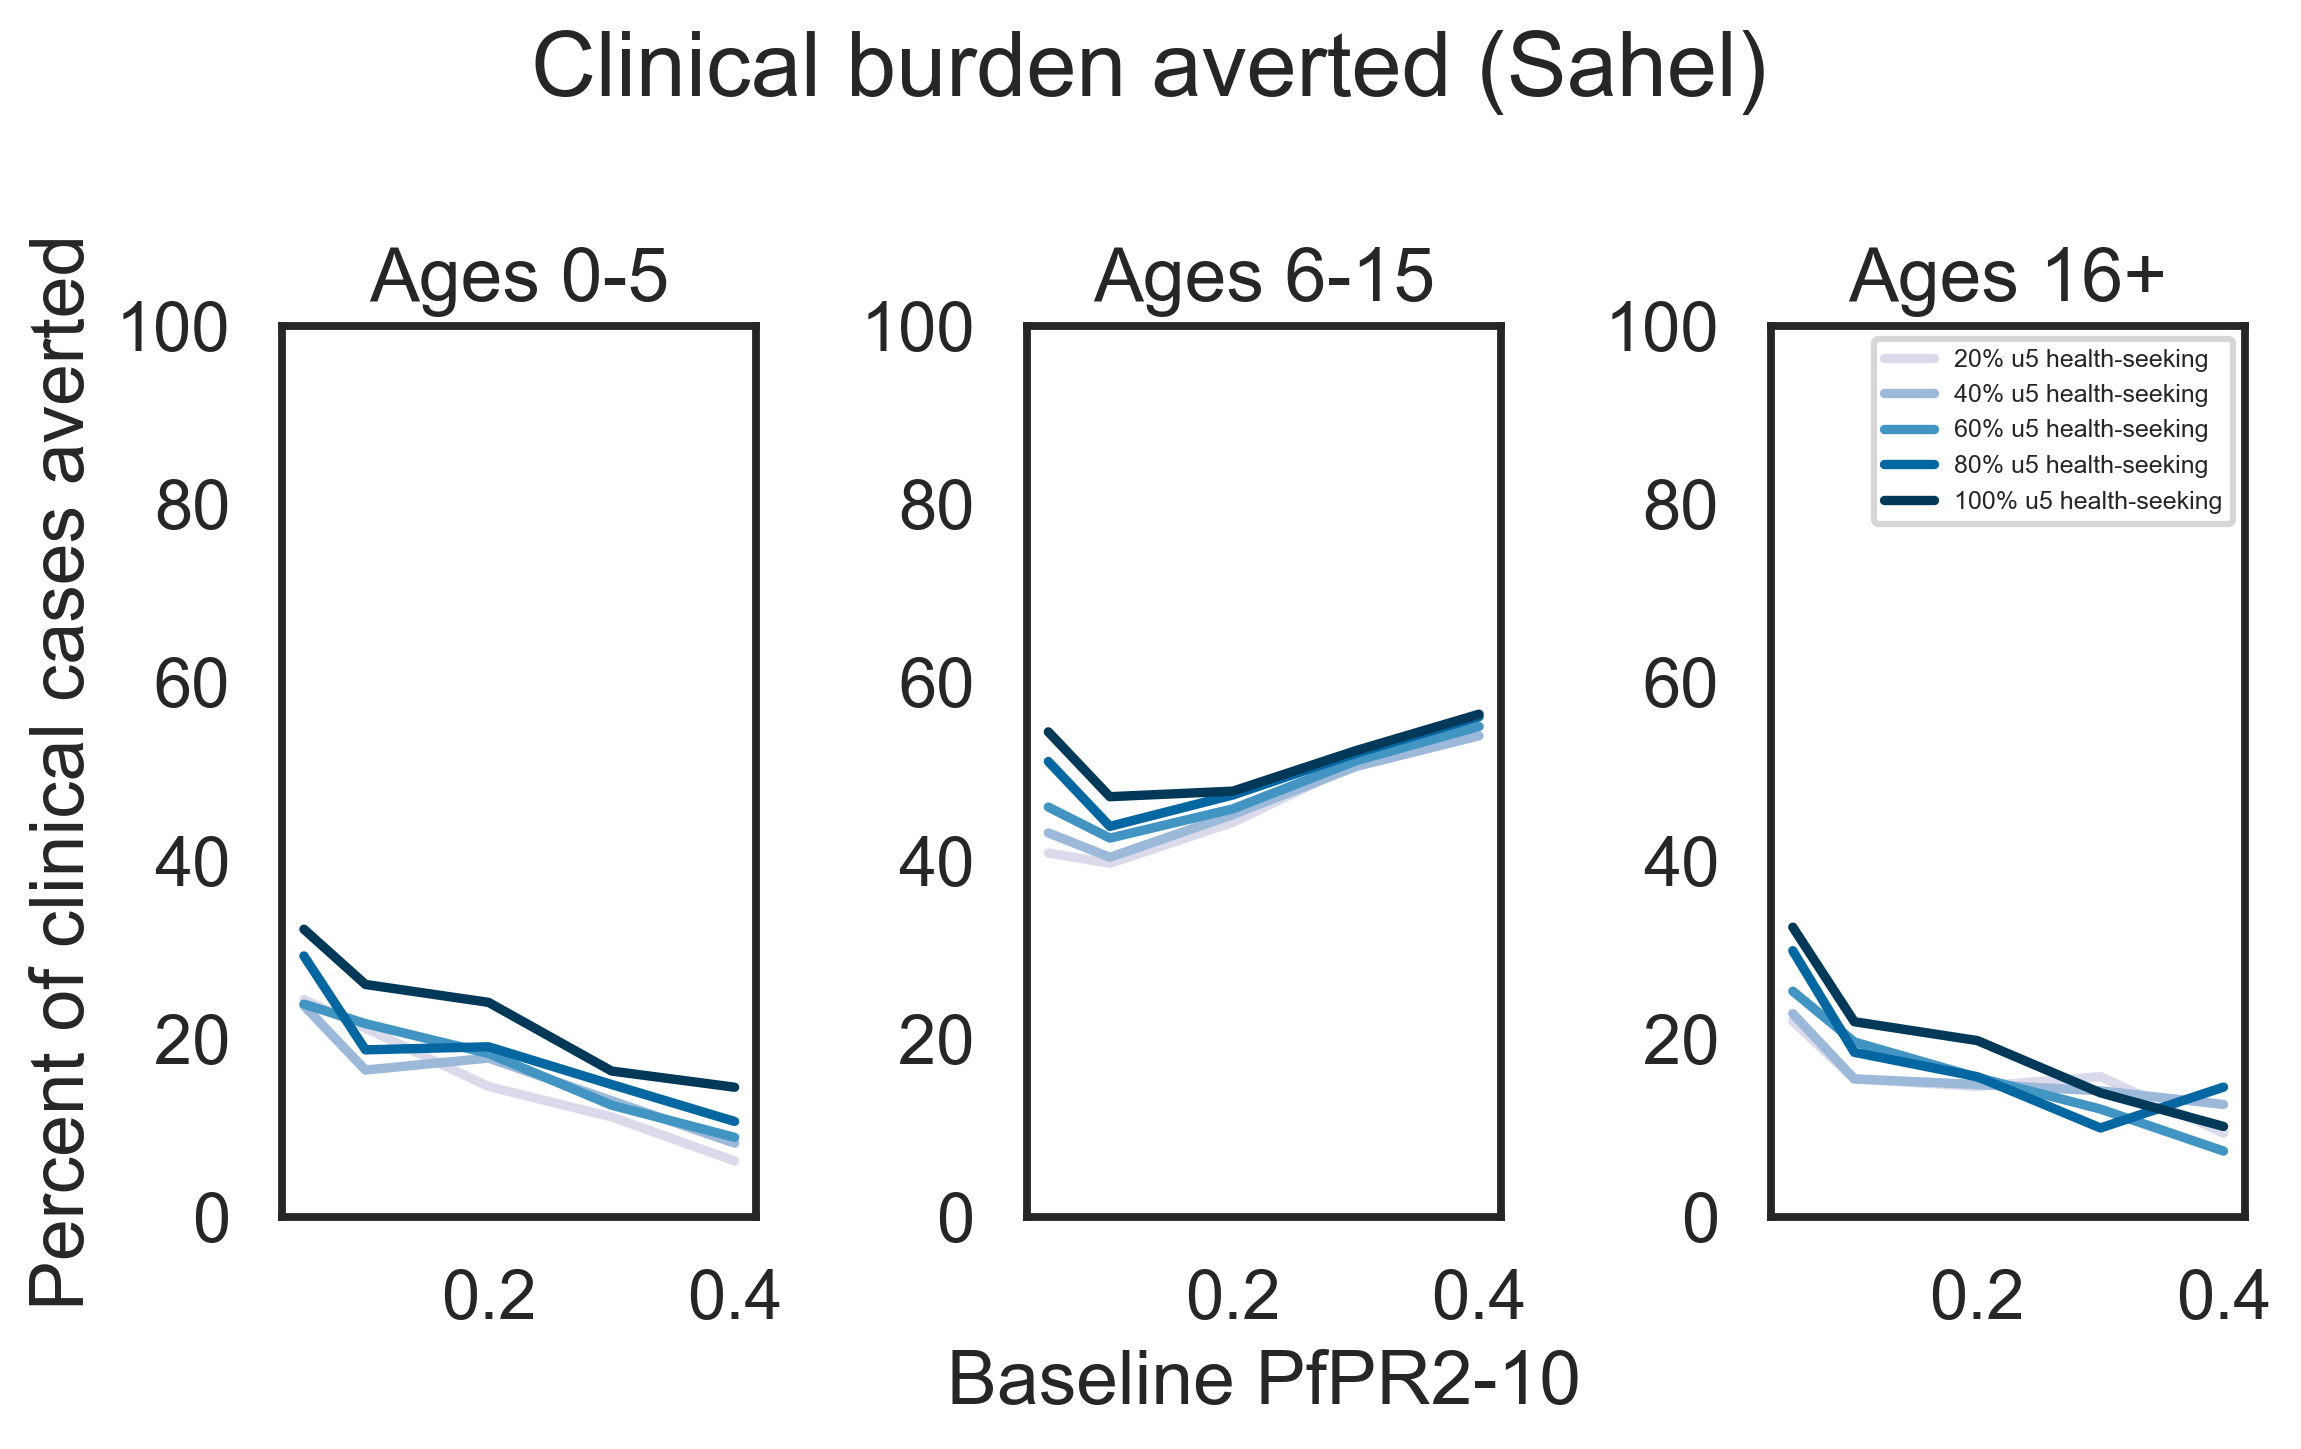

In [5]:
archetype = "Sahel"
control_scenarios = [4,3,0,2,1]
intervention_scenarios = [46,47,48,13,49]

base_by_hs = df_pfpr[np.logical_and(df_pfpr["archetype"]==archetype, np.in1d(df_pfpr["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["transmission_level","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["transmission_level"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]*100
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Sahel)")
plt.tight_layout()
plt.savefig("cases_averted_by_hs_sahel.pdf")

meta NOT subset; don't know how to subset; dropped


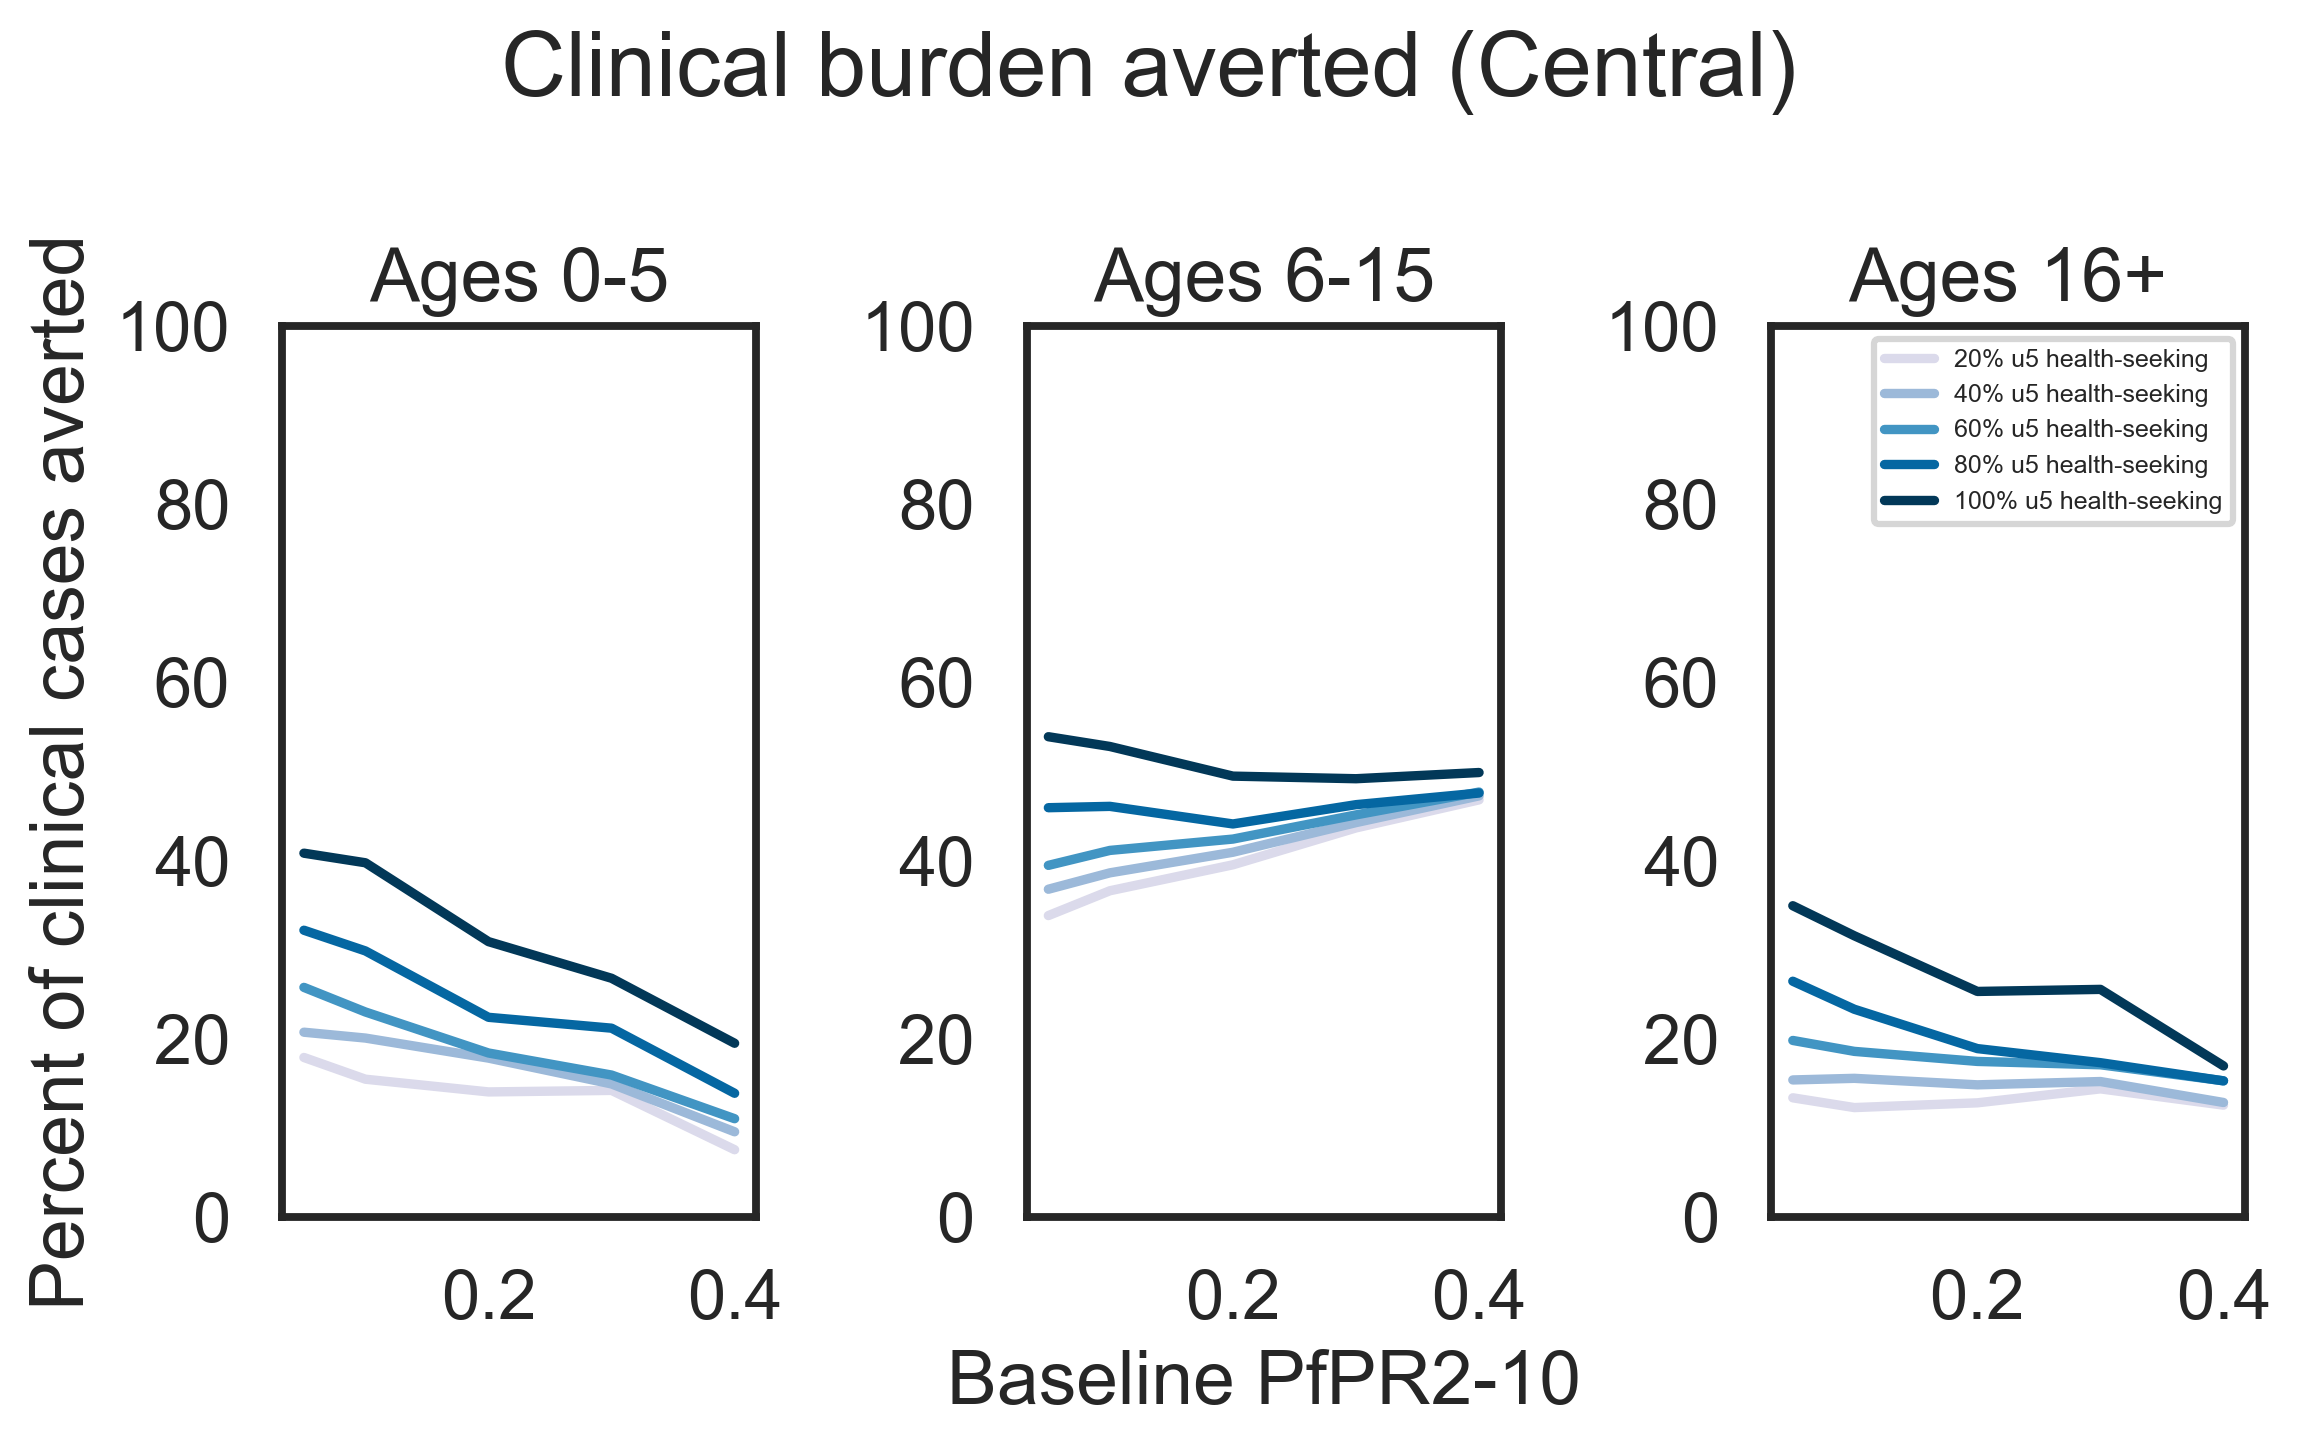

In [6]:
archetype = "Central"
control_scenarios = [42,43,44,30,45]
intervention_scenarios = [38,39,40,13,41]

base_by_hs = df_pfpr[np.logical_and(df_pfpr["archetype"]==archetype, np.in1d(df_pfpr["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["transmission_level","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["transmission_level"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]*100
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Central)")
plt.tight_layout()
plt.savefig("cases_averted_by_hs_central.pdf")

meta NOT subset; don't know how to subset; dropped


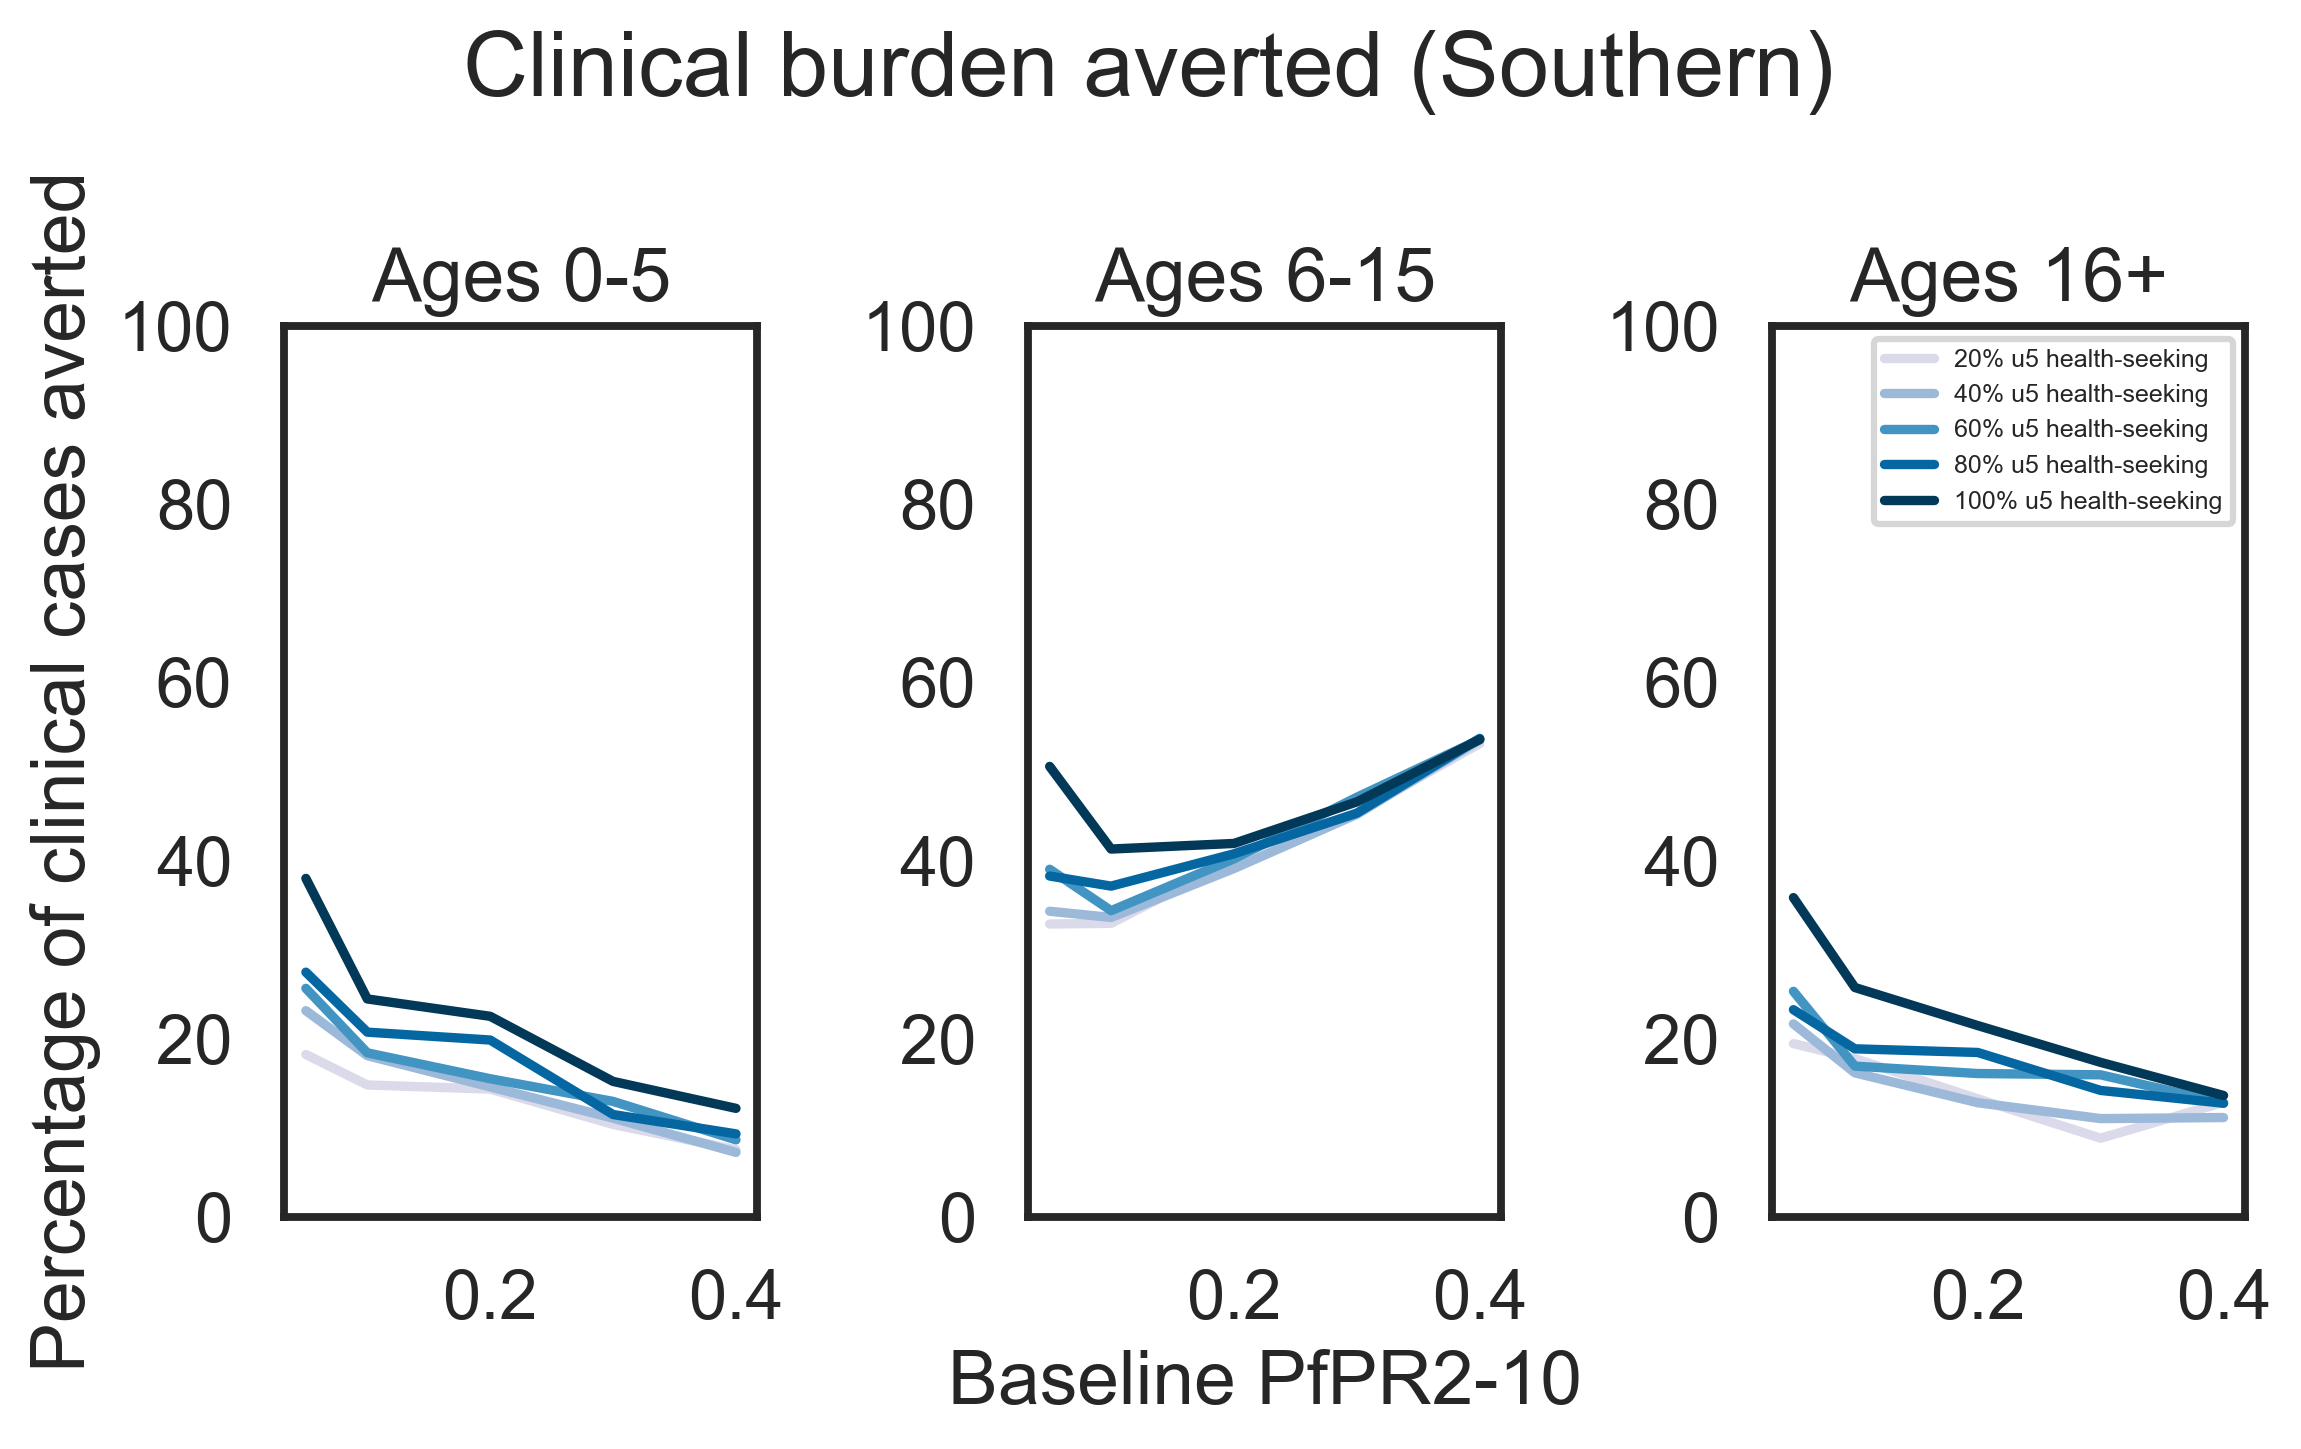

In [7]:
archetype = "Southern"
control_scenarios = [42,43,44,30,45]
intervention_scenarios = [38,39,40,13,41]

base_by_hs = df_pfpr[np.logical_and(df_pfpr["archetype"]==archetype, np.in1d(df_pfpr["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["transmission_level","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["transmission_level"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]*100
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        
        ax = plt.gca()
        # ax.set_yticks([0,20,40,60,80,100])
        # ax.set_yticklabels(["0%","20%","40%","60%","80%","100%"])
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percentage of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Southern)")
plt.tight_layout()
# plt.subplots_adjust(left=0)
plt.savefig("cases_averted_by_hs_southern.pdf")

(Deprecated) EIR version

In [8]:

archetype = "Sahel"
control_scenarios = [50,51,52,30,53]
intervention_scenarios = [46,47,48,13,49]

base_by_hs = df_pfpr[np.logical_and(df_pfpr["archetype"]==archetype, np.in1d(df["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["baseline_eir", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["baseline_eir", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["baseline_eir", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["baseline_eir", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["baseline_eir","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["baseline_eir"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Sahel)")
plt.tight_layout()
plt.savefig("cases_averted_by_hs_sahel.pdf")

ValueError: operands could not be broadcast together with shapes (970,) (2134,) 

In [ ]:
archetype = "Southern"
control_scenarios = [42,43,44,30,45]
intervention_scenarios = [38,39,40,13,41]

base_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["baseline_eir", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["baseline_eir", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["baseline_eir", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["baseline_eir", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["baseline_eir","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["baseline_eir"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Southern)")
plt.tight_layout()
plt.savefig("cases_averted_by_hs_southern.pdf")

In [ ]:
archetype = "Central"
control_scenarios = [42,43,44,30,45]
intervention_scenarios = [38,39,40,13,41]

base_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["baseline_eir", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["baseline_eir", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["baseline_eir", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["baseline_eir", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["baseline_eir","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["baseline_eir"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Central)")
plt.tight_layout()
plt.savefig("cases_averted_by_hs_central.pdf")

# (Appendix): sweep over out-of-school rate

In [ ]:
df_agg = df_pfpr[df_pfpr["archetype"]=="Sahel"]

label_dict = {
    54: "100% SACs in school",
    55: "80% SACs in school",
    56: "60% SACs in school",
    57: "40% SACs in school",
    59: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]*100
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Sahel)")
plt.tight_layout()
plt.savefig("cases_averted_by_oosr_sahel.pdf")

In [ ]:
df_agg = df_pfpr[df_pfpr["archetype"]=="Central"]

label_dict = {
    46: "100% SACs in school",
    47: "80% SACs in school",
    48: "60% SACs in school",
    49: "40% SACs in school",
    50: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]*100
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Central)")
plt.tight_layout()
plt.savefig("cases_averted_by_oosr_central.pdf")

In [ ]:
df_agg = df_pfpr[df_pfpr["archetype"]=="Southern"]

label_dict = {
    46: "100% SACs in school",
    47: "80% SACs in school",
    48: "60% SACs in school",
    49: "40% SACs in school",
    50: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]*100
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Southern)")
plt.tight_layout()
plt.savefig("cases_averted_by_oosr_southern.pdf")

(Deprecated) EIR version

In [ ]:
df_agg = df[df["archetype"]=="Sahel"]

label_dict = {
    54: "100% SACs in school",
    55: "80% SACs in school",
    56: "60% SACs in school",
    57: "40% SACs in school",
    59: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["baseline_eir"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Sahel)")
plt.tight_layout()
plt.savefig("cases_averted_by_oosr_sahel.pdf")

In [ ]:
df_agg = df[df["archetype"]=="Southern"]

label_dict = {
    46: "100% SACs in school",
    47: "80% SACs in school",
    48: "60% SACs in school",
    49: "40% SACs in school",
    50: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["baseline_eir"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Southern)")
plt.tight_layout()
plt.savefig("cases_averted_by_oosr_southern.pdf")

In [ ]:
df_agg = df[df["archetype"]=="Central"]

label_dict = {
    46: "100% SACs in school",
    47: "80% SACs in school",
    48: "60% SACs in school",
    49: "40% SACs in school",
    50: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["baseline_eir"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Central)")
plt.tight_layout()
plt.savefig("cases_averted_by_oosr_central.pdf")

# (Appendix): sweep over within-school-fraction

In [ ]:
df_agg = df[df["archetype"]=="Sahel"]

label_dict = {
    59: "20% of SACs in school treated",
    60: "40% of SACs in school treated",
    61: "60% of SACs in school treated",
    62: "80% of SACs in school treated",
    63: "100% of SACs in school treated"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.Purples((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["baseline_eir"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Sahel)")
plt.tight_layout()
plt.savefig("cases_averted_by_wsc_sahel.pdf")

In [ ]:
df_agg = df[df["archetype"]=="Southern"]

label_dict = {
    51: "20% of SACs in school treated",
    52: "40% of SACs in school treated",
    53: "60% of SACs in school treated",
    54: "80% of SACs in school treated",
    55: "100% of SACs in school treated"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.Purples((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["baseline_eir"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Southern)")
plt.tight_layout()
plt.savefig("cases_averted_by_wsc_southern.pdf")

In [ ]:
df_agg = df[df["archetype"]=="Central"]

label_dict = {
    51: "20% of SACs in school treated",
    52: "40% of SACs in school treated",
    53: "60% of SACs in school treated",
    54: "80% of SACs in school treated",
    55: "100% of SACs in school treated"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.Purples((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8,5))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["baseline_eir"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline EIR")
        if i == 0:
            plt.ylabel("Fraction of clinical burden averted")
        plt.ylim([0,0.6])
#         plt.xlabel("Baseline PfPR2-10")
        plt.title(agebin_label)
        plt.xscale("log")
plt.suptitle("Clinical burden averted (Central)")
plt.tight_layout()
plt.savefig("cases_averted_by_wsc_central.pdf")